## 5.Write a program to develop the Naive Bayes classifier on Titanic dataset


Confusion Matrix:
 [[86 19]
 [37 37]]
Accuracy: 0.6871508379888268


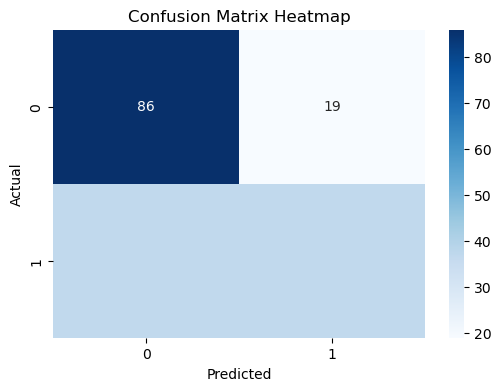

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r"Titanic-Dataset.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()